<a href="https://colab.research.google.com/github/gabrielmprata/MVP_Sprint01_Puc_Rio/blob/main/MVP_Analise_de_Dados_e_boas_praticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

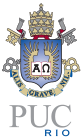 <font size="4"> **MVP de Análise de Dados e Boas Práticas**

---
>
**Pós-Graduação em Ciência de Dados e Analytics**
>
**Sprint 01**
>
**Aluno**: Gabriel Prata
>
**Data**: 29/03/2023
>
---

#**<font color=#FE8202> 1. Definição do problema**

A malha rodoviária é a principal forma de locomoção do país no que tange o deslocamento de pessoas, produtos, matérias primas, alimentos e combustível a curtas e longas distâncias.
>
Este trabalho visa mostrar através dos dados abertos disponibilizados pela Polícia Rodoviária Federal, dentre os 70.000 Km de rodovias onde atua, o impacto dos acidentes de trânsito e sua letalidade nas rodovias federais, tendo como período analisado o ano de 2020.
>
O Brasil é o terceiro país com mais mortes no trânsito, ficando atrás apenas da Índia e da China segundo o relatório Global Status Report on Road Safety da Organização Mundial de Saúde (OMS). 
>
Cerca de 82% dos acidentes de trânsito nas rodovias federais brasileiras, são com vítimas, tendo em vista esse grande percentual de vítimas, nesse estudo, queremos entender os fatores que contribuem para os acidentes acontecerem. 
>
Esse estudo tem como objetivo geral analisar o estado físico dos envolvidos, classificando o acidente de trânsito em "com vítimas" ou "sem vítimas", fazendo uso de algoritmos de aprendizado de máquina supervisionado.
>
O dataset conta com 30 atributos relacionados à caracterização do acidente, 4 atributos que classifica o estado das vítimas em, ilesos, feridos leve, feridos grave e mortos, e 1 variável que classifica o acidente em, sem vítimas, com vítimas feridas e com vitimas fatais. Essa ultima variável utilizaremos como alvo e as demais, serão analisadas para definir quais serão selecionadas como preditoras.
>
Para mais informações sobre o dataset, consulte: https://arquivos.prf.gov.br/arquivos/index.php/s/mheQDcXUx2veHnU#pdfviewer


>**<font color=#FE8202> Dicionário de dados**

1.   **id**    -  Variável com valores numéricos, representando o identificador do acidente
2.   **pesid** - Variável com valores numéricos, representando o identificador da pessoa envolvida
3. **data_inversa** - Data da ocorrência no formato dd/mm/aaaa.
4. **dia_semana** - Dia da semana da ocorrência. Ex.: Segunda, terça, etc.
5. **horario** - Horário da ocorrência no formato hh:mm:ss.
6. **uf** - Unidade da Federação. Ex.: MG, SP, etc.
7. **br** - Variável com valores numéricos, representando o identificador da BR.
8. **km** - Identificação do quilômetro onde ocorreu o acidente, com valor mínimo de 0,1 km e com a casa decimal separada por ponto.
9. **municipio** - Nome do município de ocorrência do acidente.
10. **causa_acidente** - Identificação da causa principal do acidente.
11. **tipo_acidente** - Identificação do tipo de acidente. Ex.: Colisão frontal, etc.
12. **classificação_acidente** - Classificação quanto à gravidade do acidente.
13. **fase_dia** - Fase do dia no momento do acidente. Ex.: Amanhecer, Pleno dia, etc.
14. **sentido_via** - Sentido da via considerando o ponto de colisão: Crescente e decrescente.
15. **Condição_meteorologica** - Condição meteorologica no momento do acidente. Ex.: Céu claro, chuva, etc.
16. **tipo_pista** - Tipo da pista considerando a quantidade de faixas: Dupla. simples ou múltipla.
17. **tracado_pista** - Descrição do traçãdo da via.
18. **usu_solo** - Descrição sobre as características do local do acidente: Urbano=Sim;Rural=Não.
19. **id_veiculo** - Variável com valores numéricos, representando o identificador do veículo envolvido.
20. **tipo_veiculo** - Tipo do veículo conforme Art. 96 do CNT. Ex.: Automóvel, Caminhão, etc.
21. **marca** - Descrição da marca do veículo.
22. **ano_fabricacao_veiculo** - Ana de fabricação do veículo, formato aaaa.
23. **tipo_envolvido** - Tipo de envolvido no acidente conforme sua participação no evento. Ex.: condutor, passageiro, etc.
24. **estado_fisico** - Condição do envolvido conforme a gravidade das lesões.Ex.:morto,feridoleve,etc.
25. **idade** - Idade do envolvido. O código "-1" indica que não foi possivel coletar a informação.
26. **sexo** - Sexo do envolvido. O valor "invalido" indica que não foi possivel coletar a informação.
27. **ilesos** - Valor binário que identifica se o envolvido foi classificado como ileso.
28. **feridos_leves** - Valor binário que identifica se o envolvido foi classificado como ferido leve.
29. **feridos_graves** - Valor binário que identifica se o envolvido foi classificado como ferido grave.
30. **mortos** - Valor binário que identifica se o envolvido foi classificado como morto.
31. **latitude** - Latitude do local do acidente em formato geodésico decimal.
32. **longitude** - Longitude do local do acidente em formato geodésico decimal.
33. **regional** - Não definido no dicionário de dados fornecido pela PRF.
34. **delegacia** - Não definido no dicionário de dados fornecido pela PRF.
35. **uop** - Não definido no dicionário de dados fornecido pela PRF.



In [12]:
# Importação de pacotes
import pandas as pd
import numpy as np
import missingno as ms # para tratamento de missings

#bibliotecas para visualização de dados
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")


#**<font color=#FE8202> 2. Carga de Dados**

Nesse tópico iremos importar o dataset que está armazenado no GitHub, no formato CSV, com cabeçalho e separado por ponto e vírgula(;).
>
Iremos utilizar o pacote Pandas, para carregar esse arquivo, através de uma URL, e armazenaremos os dados em um **dataframe**(matrizes multidimensionais similares a uma tabela de dados relacionais, com linhas e colunas rotuladas).
>
Para isso, utilizaremos o método read_csv()

In [13]:
# importando dados de uma url para um dataframe

# URL de importação
url = "https://raw.githubusercontent.com/gabrielmprata/MVP_Sprint01_Puc_Rio/main/acidentes2020_PRF.csv"

# Carga do dataset para o Pandas dataframe
acidentes = pd.read_csv(url, encoding="Latin 1", sep=';')

In [ ]:
# verificando se é um dataframe
type(acidentes)

pandas.core.frame.DataFrame

In [14]:
# Exibe as 5 primeiras linhas (Default do comando head)
acidentes.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,delegacia
0,260068,578549.0,01/01/2020,quarta-feira,05:40:00,PA,316.0,84,SAO FRANCISCO DO PARA,Falta de Atenção à Condução,...,2008.0,Condutor,Lesões Leves,38.0,Masculino,0,1,0,0,DEL01-PA
1,260068,578550.0,01/01/2020,quarta-feira,05:40:00,PA,316.0,84,SAO FRANCISCO DO PARA,Falta de Atenção à Condução,...,2008.0,Passageiro,Lesões Leves,14.0,Masculino,0,1,0,0,DEL01-PA
2,260073,580299.0,01/01/2020,quarta-feira,06:00:00,MG,262.0,804,UBERABA,Falta de Atenção à Condução,...,NaN,Condutor,Ileso,NaN,Masculino,1,0,0,0,DEL13-MG
3,260087,578794.0,01/01/2020,quarta-feira,06:00:00,BA,116.0,191,CANUDOS,Condutor Dormindo,...,2015.0,Condutor,Óbito,64.0,Masculino,0,0,0,1,DEL07-BA
4,260116,578657.0,01/01/2020,quarta-feira,10:08:00,SP,116.0,71,APARECIDA,Não guardar distância de segurança,...,2015.0,Condutor,Ileso,57.0,Masculino,1,0,0,0,DEL08-SP


#**<font color=#FE8202> 3. Análise de Dados**

Nessa etapa iremos fazer a análise exploratória de dados.
>
Uma etapa bem crítica, pois nesse primeiro momento, devemos compreender bem os dados.
>
Depois de entender melhor esses dados, seremos capazes de limpar, transformar e apresentar melhor os dados, assim como obter os melhores resultados possíveis nos algoritmos de Machine Learning.

###**<font color=#FE8202> 3.1. Estatísticas Descritivas**

Compreende a organização, o resumo e, descrever os dados, que podem ser expressos em tabelas e gráficos.
>
Veremos a seguir alguns comandos para exibir algumas estatísticas descritivas.
>
---



In [ ]:
#	Quantidade de atributos e instâncias (linhas/colunas)
acidentes.shape

(99999, 29)

In [ ]:
# verificando os tipos de dados de cada coluna do dataframe
acidentes.dtypes

id                         object
pesid                     float64
data_inversa               object
dia_semana                 object
horario                    object
uf                         object
br                        float64
km                         object
municipio                  object
causa_acidente             object
tipo_acidente              object
classificacao_acidente     object
fase_dia                   object
sentido_via                object
condicao_metereologica     object
tipo_pista                 object
tracado_via                object
uso_solo                   object
tipo_veiculo               object
ano_fabricacao_veiculo    float64
tipo_envolvido             object
estado_fisico              object
idade                     float64
sexo                       object
ilesos                      int64
feridos_leves               int64
feridos_graves              int64
mortos                      int64
delegacia                  object
dtype: object

In [ ]:
# Mostra diversas informações do Dataframe em um único comando
acidentes.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      99999 non-null  object 
 1   pesid                   99998 non-null  float64
 2   data_inversa            99999 non-null  object 
 3   dia_semana              99999 non-null  object 
 4   horario                 99999 non-null  object 
 5   uf                      99999 non-null  object 
 6   br                      99744 non-null  float64
 7   km                      99744 non-null  object 
 8   municipio               99999 non-null  object 
 9   causa_acidente          99999 non-null  object 
 10  tipo_acidente           99999 non-null  object 
 11  classificacao_acidente  99999 non-null  object 
 12  fase_dia                99999 non-null  object 
 13  sentido_via             99999 non-null  object 
 14  condicao_metereologica  99999 non-null



---


A função info() da biblioteca pandas, nos fornece um resumo do dataframe, sendo muito útil para ter uma visão geral do conjunto de dados. 
>
Usando o parâmetro memory_usage = “deep”, saberemos exatamente quanto de memória o dataframe está utilizando.
>
Sendo assim, depois dos processos de transformações de dados saberemos se tivemos algum ganho de memoria no dataframe.


O dataframe está ocupando cerca de 150 Megas de espaço.


---



In [ ]:
# Exibe as 5 primeiras linhas (Default do comando head)
acidentes.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,delegacia
0,260068,578549.0,01/01/2020,quarta-feira,05:40:00,PA,316.0,84,SAO FRANCISCO DO PARA,Falta de Atenção à Condução,...,2008.0,Condutor,Lesões Leves,38.0,Masculino,0,1,0,0,DEL01-PA
1,260068,578550.0,01/01/2020,quarta-feira,05:40:00,PA,316.0,84,SAO FRANCISCO DO PARA,Falta de Atenção à Condução,...,2008.0,Passageiro,Lesões Leves,14.0,Masculino,0,1,0,0,DEL01-PA
2,260073,580299.0,01/01/2020,quarta-feira,06:00:00,MG,262.0,804,UBERABA,Falta de Atenção à Condução,...,NaN,Condutor,Ileso,NaN,Masculino,1,0,0,0,DEL13-MG
3,260087,578794.0,01/01/2020,quarta-feira,06:00:00,BA,116.0,191,CANUDOS,Condutor Dormindo,...,2015.0,Condutor,Óbito,64.0,Masculino,0,0,0,1,DEL07-BA
4,260116,578657.0,01/01/2020,quarta-feira,10:08:00,SP,116.0,71,APARECIDA,Não guardar distância de segurança,...,2015.0,Condutor,Ileso,57.0,Masculino,1,0,0,0,DEL08-SP


In [ ]:
# Exibe as 5 últimas linhas (Default do comando tail)
acidentes.tail()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,delegacia
99994,305207,680089.0,02/09/2020,quarta-feira,15:50:00,MG,40.0,564,NOVA LIMA,Desobediência às normas de trânsito pelo condutor,...,2018.0,Condutor,Ileso,30.0,Masculino,1,0,0,0,DEL01-MG
99995,305208,678320.0,02/09/2020,quarta-feira,16:50:00,SP,116.0,"112,3",TAUBATE,Falta de Atenção à Condução,...,2009.0,Condutor,Ileso,42.0,Masculino,1,0,0,0,DEL06-SP
99996,305208,678327.0,02/09/2020,quarta-feira,16:50:00,SP,116.0,"112,3",TAUBATE,Falta de Atenção à Condução,...,2015.0,Condutor,Lesões Leves,23.0,Masculino,0,1,0,0,DEL06-SP
99997,305208,678324.0,02/09/2020,quarta-feira,16:50:00,SP,116.0,"112,3",TAUBATE,Falta de Atenção à Condução,...,2011.0,Condutor,Lesões Leves,22.0,Masculino,0,1,0,0,DEL06-SP
99998,305208,678319.0,02/09/2020,quarta-feira,16:50:00,SP,116.0,"112,3",TAUBATE,Falta de Atenção à Condução,...,2013.0,Condutor,Ileso,41.0,Masculino,1,0,0,0,DEL06-SP


Com a exibição das linhas, é mais fácil perceber que o processo de importação, considerou alguns atributos como Float ao inves de integer.
>
Nesse momento não irá interferir na exploração inicial de dados, depois na etpada de pre-processamento iremos modificar.
  

---



In [ ]:
# Quantidade de valores únicos
acidentes.nunique()

id                        48733
pesid                     99998
data_inversa                366
dia_semana                    7
horario                    1189
uf                           27
br                          113
km                         7293
municipio                  1727
causa_acidente               40
tipo_acidente                20
classificacao_acidente        3
fase_dia                      4
sentido_via                   3
condicao_metereologica        9
tipo_pista                    3
tracado_via                  10
uso_solo                      2
tipo_veiculo                 24
ano_fabricacao_veiculo       62
tipo_envolvido                6
estado_fisico                 5
idade                       117
sexo                          4
ilesos                        2
feridos_leves                 2
feridos_graves                2
mortos                        2
delegacia                   150
dtype: int64

Com o comando nunique() já podemos ter uma rápida noção da coerência dos atributos, como por exemplo:
>
Temos 366 valores diferentes no atributo data_inversa, o que indica conter os 366 dias do ano bissexto de 2020, ou seja, coerente.
>
Temos 117 valores diferentes no atributo idade, o que pode indicar alguma discrepância nos valores informados, ou seja, precisamos explorar mais esse atributo.
>


---




In [ ]:
# Quantidade de nulls no dataframe
acidentes.isnull().sum()

id                            0
pesid                         1
data_inversa                  0
dia_semana                    0
horario                       0
uf                            0
br                          255
km                          255
municipio                     0
causa_acidente                0
tipo_acidente                 0
classificacao_acidente        0
fase_dia                      0
sentido_via                   0
condicao_metereologica        0
tipo_pista                    0
tracado_via                   0
uso_solo                      0
tipo_veiculo                  0
ano_fabricacao_veiculo     6942
tipo_envolvido                0
estado_fisico                 0
idade                     10207
sexo                          0
ilesos                        0
feridos_leves                 0
feridos_graves                0
mortos                        0
delegacia                    50
dtype: int64

Dos 29 atributos, 6 apresentam registros nulos, que deverão ser tratados na etapa de pre-processamento de dados.


---



Vamos agora verificar se existe alguma duplicidade de registro.
>
Segundo a documentação do dataset existe o campo ID com o número único do registro do acidente, e o pesid com o número único que identifica a pessoa envolvida no registro do acidente.
>
Sendo assim devemos ter apenas 1 pesid distinto por ID de acidente, ou seja, só posso registrar uma vez a pessoa na ocorrência do acidente, mesmo que esse acidente tenha mais pessoas envolvidas.
>
Para essa analise iremos utilizar o método duplicated()

In [ ]:
# Quantidade de registros duplicados
# subset - agrupa as colunas chaves
# keep='first' - Se primeiro, considera o primeiro valor como único e o resto como duplicado

acidentes.duplicated(subset=['id','pesid'], keep='first').sum()

0

O método retorna 0, o que indica que o dataframe não tem duplicidade de registros.


---



In [ ]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
acidentes.describe().round(2)

,pesid,br,ano_fabricacao_veiculo,idade,ilesos,feridos_leves,feridos_graves,mortos
count,99998.00,99744.00,93057.00,89792.00,99999.00,99999.00,99999.00,99999.00
mean,637277.15,213.80,2009.70,39.77,0.43,0.36,0.11,0.03
std,37355.63,130.99,7.89,40.44,0.50,0.48,0.31,0.18
min,578461.00,10.00,1900.00,0.00,0.00,0.00,0.00,0.00
25%,607253.25,101.00,2007.00,28.00,0.00,0.00,0.00,0.00
50%,634993.50,163.00,2011.00,37.00,0.00,0.00,0.00,0.00
75%,662202.75,324.00,2015.00,48.00,1.00,1.00,0.00,0.00
max,1008120.00,495.00,2020.00,2019.00,1.00,1.00,1.00,1.00


O atributo idade, apresenta um valor máximo de 2.019, o que seria uma inconsistência.
>
Já a idade mínima com valor 0, representa bebês que ainda não completaram 1 ano.
>
Sendo assim, vou selecionar no dataframe acidentes todas as idades maiores que 100, agrupando e contando quantas vezes elas aparecem no dataframe.
>
Assim já teremos uma noção de quantas idades estão inconsistentes no dataframe.

In [ ]:
# Verificar idades inconsistentes
# Cria um dataframe com idade > 100, agrupando e contando quantas vezes aparecem no dataframe
verifica_idade = (acidentes[(acidentes['idade'] > 100)].groupby(['idade'])['idade'].count()).to_frame() #to_frame- método que converte Series em Dataframe
verifica_idade = verifica_idade.rename(columns = {'idade':'total'}) #renomeia a coluna idade para total

# Exibe os valores em ordem decrescente, pela coluna total
verifica_idade.sort_values(by='total', ascending=False)


,total
idade,
909.0,79
120.0,20
220.0,20
2019.0,10
1919.0,4
1020.0,2
1000.0,1
2018.0,1
1931.0,1


Encontramos 18 idades com valores aparentementes inconsistentes, que serão tratados nas próximas etapas.
Outro ponto que iremos tratar é a conversão de float para integer.


---



Vamos verificar agora a distribuição de frequência do atributo alvo classificacao_acidente.
>
Lembrando que ainda iremos tratar esse atributo, convertendo para binário, onde a classe 0 será o acidente "Sem vitimas"(classificacao_acidente == 'Sem Vítimas'), e os demais, com a classe 1 "Com vítimas".

In [ ]:
# distribuição das classes
acidentes.groupby('classificacao_acidente').size().sort_values(ascending=False)

classificacao_acidente
Com Vítimas Feridas    75117
Sem Vítimas            15499
Com Vítimas Fatais      9383
dtype: int64

In [ ]:
# Verificando o percentual da distribuição
acidentes.classificacao_acidente.value_counts(normalize=True) 

Com Vítimas Feridas    0.751178
Sem Vítimas            0.154992
Com Vítimas Fatais     0.093831
Name: classificacao_acidente, dtype: float64

A distribuição retrata a realidade do quadro de vítimas em acidentes de transito, sendo assim, não poderemos tratar esse atributo.


---



Vamos analisar alguns atributos importantes, de forma individual, para ver se existe a necessidade de tomar alguma ação.

In [ ]:
# Verificando o conteudo do atributo e a sua distribuição entre eles
# dia_semana (Dia da semana da ocorrência)
acidentes.dia_semana.value_counts() 

terça-feira      12586
quinta-feira     12908
quarta-feira     13026
segunda-feira    13402
sexta-feira      15702
domingo          16057
sábado           16318
Name: dia_semana, dtype: int64

Para esse atributo, iremos na proxima etapa, criar uma nova coluna com o valor númerico referente ao dia da semana, utilizando função weekday.
>
Assim fica mais facil ordenar em um gráfico a sequencia semana, de segunda a domingo, proporcionando ao usuário um fácil leitura temporal.


---



In [ ]:
# Verificando o conteudo do atributo e a sua distribuição entre eles
# fase_dia (Fase do dia no momento do acidente)
acidentes.fase_dia.value_counts()

Pleno dia      55045
Plena Noite    34702
Anoitecer       5866
Amanhecer       4386
Name: fase_dia, dtype: int64



---



In [ ]:
# Verificando o conteudo do atributo e a sua distribuição entre eles
# condicao_metereologica (Condição meteorologica no momento do acidente)
acidentes.condicao_metereologica.value_counts()

Céu Claro           59182
Nublado             16422
Chuva               11198
Sol                  7710
Garoa/Chuvisco       3318
Ignorado             1111
Nevoeiro/Neblina      877
Vento                 178
Granizo                 3
Name: condicao_metereologica, dtype: int64

In [ ]:
#percentual da distribuição
(acidentes.condicao_metereologica.value_counts(normalize=True)*100).round(1)

Céu Claro           59.2
Nublado             16.4
Chuva               11.2
Sol                  7.7
Garoa/Chuvisco       3.3
Ignorado             1.1
Nevoeiro/Neblina     0.9
Vento                0.2
Granizo              0.0
Name: condicao_metereologica, dtype: float64

Para esse atributo, temos o valor "Ignorado". Utlizando o parâmetro normalize=True, verificamos que o percentual dele é baixo, sendo assim não iremos tratá-lo.


---



In [ ]:
# Verificando o conteudo do atributo e a sua distribuição entre eles
# estado_fisico (Condição do envolvido conforme a gravidade das lesões)
acidentes.estado_fisico.value_counts()

Ileso            43052
Lesões Leves     35621
Lesões Graves    10823
Não Informado     7051
Óbito             3452
Name: estado_fisico, dtype: int64

In [ ]:
#percentual da distribuição
(acidentes.estado_fisico.value_counts(normalize=True)*100).round(1)

Ileso            43.1
Lesões Leves     35.6
Lesões Graves    10.8
Não Informado     7.1
Óbito             3.5
Name: estado_fisico, dtype: float64

Em cerca de 7% dos registros, a condição da lesão do envolvido não é informada(Não Informado), é importante deixar esse valor, para que possa ser apurado uma melhoria na coleta dos dados.
>
Poderiamos criar um modelo de Machine Learning para classicar esses registros, mas não estaria presente nas analises a falta da coleta dessa informação tão importante.

In [ ]:
# Verificando o conteudo do atributo e a sua distribuição entre eles
# sexo (Sexo do envolvido. O valor "invalido" indica que não foi possivel coletar a informação.)
acidentes.sexo.value_counts()

Masculino        73315
Feminino         19152
Não Informado     7051
Ignorado           481
Name: sexo, dtype: int64

In [ ]:
#percentual da distribuição
(acidentes.sexo.value_counts(normalize=True)*100).round(1)

Masculino        73.3
Feminino         19.2
Não Informado     7.1
Ignorado          0.5
Name: sexo, dtype: float64

In [ ]:
sexo_hist = acidentes.groupby(["ano","mes","sexo"])['id'].count().reset_index()
sexo_hist

,ano,mes,sexo,id
0,2020,1,Feminino,2810
1,2020,1,Ignorado,78
2,2020,1,Masculino,8433
3,2020,1,Não Informado,724
4,2020,2,Feminino,2608
5,2020,2,Ignorado,43
6,2020,2,Masculino,8021
7,2020,2,Não Informado,703
8,2020,3,Feminino,1678
9,2020,3,Ignorado,37


In [ ]:
acidentes['data_hora'] = acidentes['data_inversa'].map(str) + ' ' + acidentes['horario']
acidentes['data_hora'] = pd.to_datetime(acidentes['data_hora'])
acidentes['ano'] = acidentes['data_hora'].dt.year
acidentes['mes'] = acidentes['data_hora'].dt.month
acidentes['hora'] = acidentes['data_hora'].dt.hour

###**<font color=#FE8202> 3.2. Visualizações Unimodais**

Utilizaremos o gráfico de boxplot para comparar visualmente as distribuições das variáveis NUMÉRICAS agrupada conforme uma variável categórica.
>
Esse gráfico nos dá informação da assimetria da distribuição, indicação de outliers e da variabilidade dos dados por meio da amplitude. 
>
Consiste em 5 grupos: Mínimo, Primeiro quartil ou 25%, Mediana (segundo quartil) ou 50%, Terceiro quartil ou 75% e Máximo.

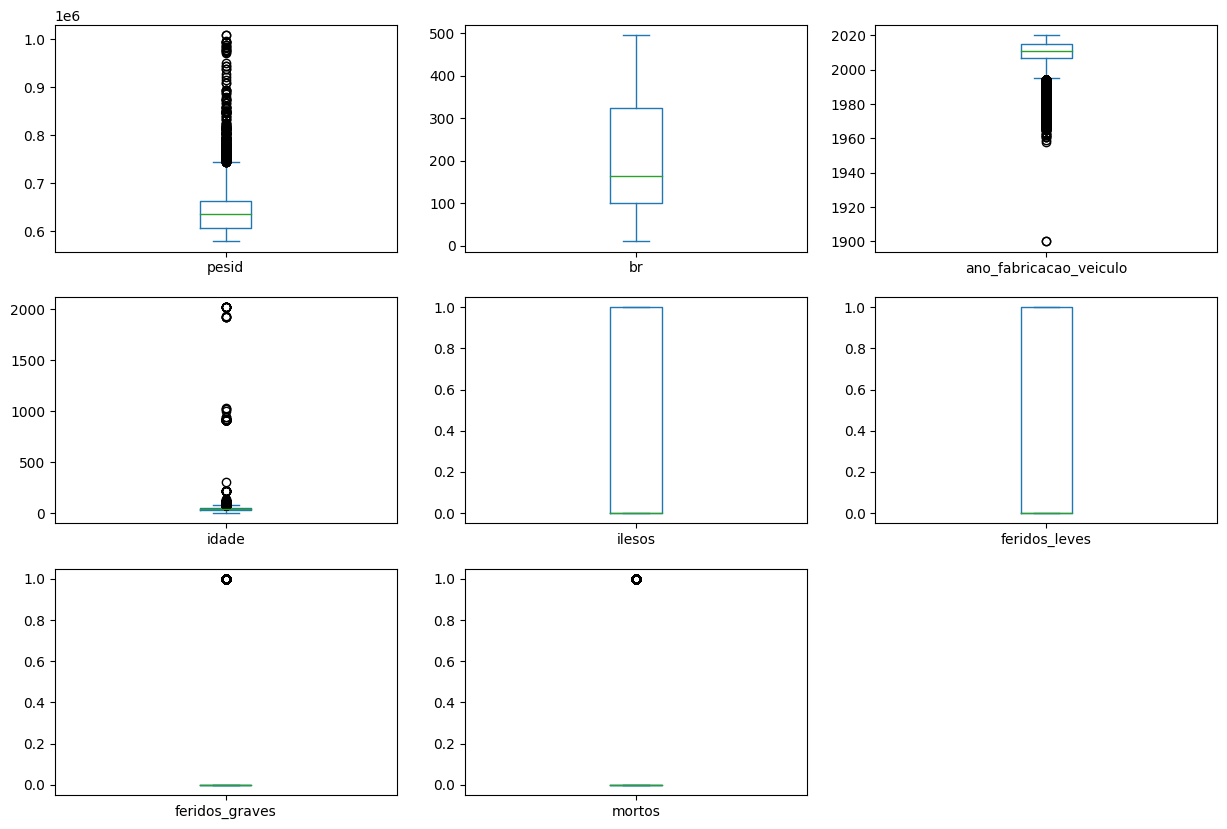

In [ ]:
# Boxplot
acidentes.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

O atributo pesid representa uma sequencia numerica que identifica uma pessoa no sistema, sendo assim, vamos desprezar essa informação.
>
O atributo idade nos mostra a presença de outliers, como já visto anteriormente.
>
O atributo ano_fabricacao_veiculo, é possivel verificar o valor minímo de 1900, o que seria uma inconsistencia, e os demais valores estão coerentes.


---



Outra maneira de verificar a distribuição dos atributos é a utilização de um histograma.

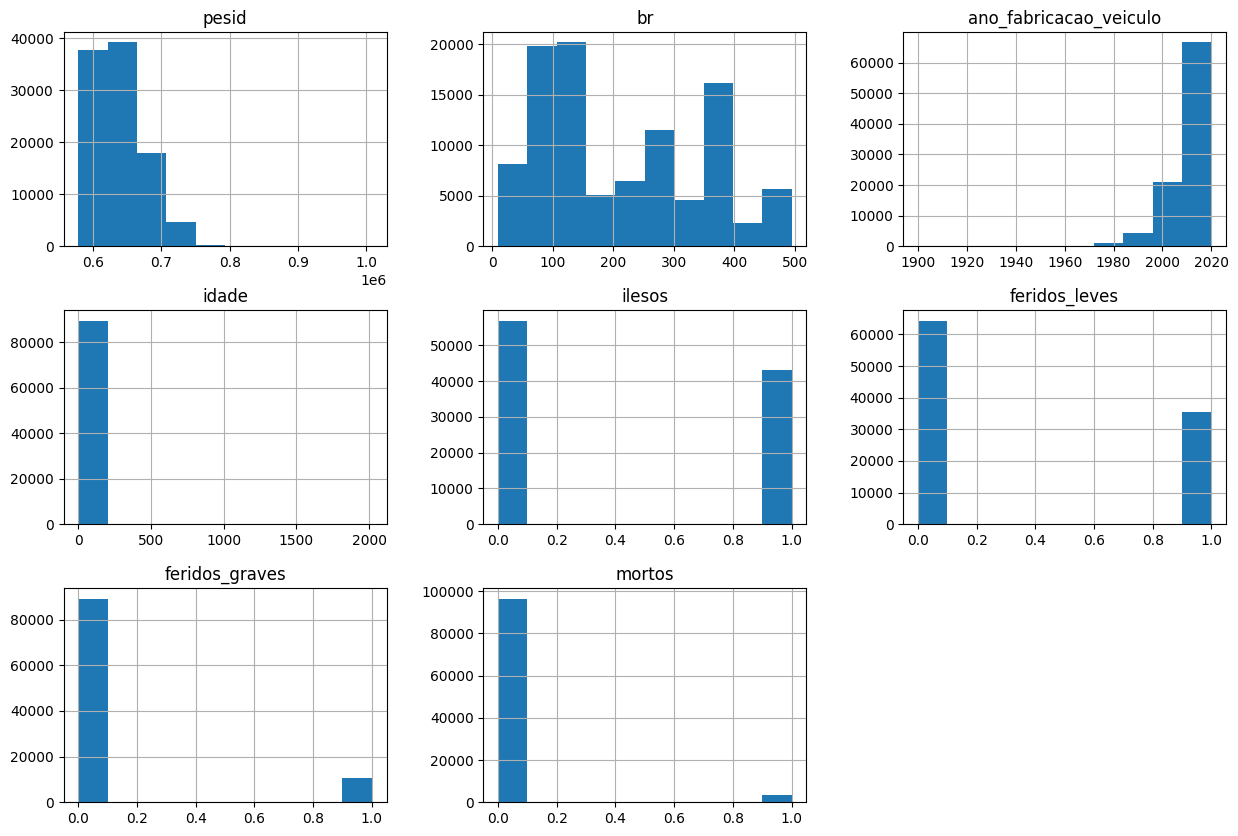

In [ ]:
# Histograma
acidentes.hist(figsize = (15,10))
plt.show()